#Week 3 Homework 1: Habits

In this assignment you'll explore a simple adjustment to the standard power-utility model. The power utility model needed variation in expected consumption growth or the variance of consumption growth to generate variation in the risk free rate or the risk premium. The utility function in this assignment generates variation in interest rates and risk premiums internally -- with no variation at all in the expected value or variance of consumption growth! Moreover, it captures the basic facts of business cycles and panics.

Suppose the utility function is

$$u(c)=\frac{(c−X)^{1−\gamma}}{1−\gamma}$$

$X$ may represent an amount that the investor has borrowed, and there are huge costs of bankruptcy if he does not repay it. Or the investor could be a university endowment that has to pay $X$ to its tenured professors, or a defined-benefit pension fund that must pay $X$ to retirees. $X$ could also represent a backstop level of consumption that the investor is simply not willing to risk no matter what ("I'd rather die than fly commercial, honey" -- overheard at hedge fund cocktail party.)

This small variation gives you practice with the transformations we did in lecture. It is also very interesting. The power utility model needed variation in expected consumption growth or the variance of consumption growth to generate variation in the risk free rate or the risk premium. This utility function generates variation in interest rates and risk premiums internally -- with no variation at all in the expected value or variance of consumption growth! Moreover, it captures the basic facts of business cycles and panics.

(This is a special case of " habit persistence" utility. In general, we also let $X_t$ adapt slowly to past consumption, yielding a bit more realism in the dynamics.) 


####Question 1

Plot the utility function $u(c)=\frac{(c−X)^{1−\gamma}}{1−\gamma}$, and compare it to the standard $X=0$ case. Use $\gamma=2$ and $X=1$. This plot will help you to understand the rest of the questions. Ponder your graph. Enter the numbers of the correct statements, separated by spaces:

1. The level of utility can be negative for $c>X$. This will introduce arbitrage    opportunities if we're not careful.

2. This utility function should not be paired with an endowment that can ever fall below $X$.

3. This utility function is bounded above, so the consumer is eventually satiated as in the quadratic utility case if we're not careful.

4. Utility goes to $−\infty$ at $c=X$, instead of at $c=0$ for the conventional utility function.

5. Utility goes to $-\infty$ at $c=−X$, instead of at $c=0$ for the conventional utility function.

6. Marginal utility goes to $\infty$ at $c=X$.

7. Marginal utility goes to $−\infty$ at $c=X$. 

2,4,6


/usr/local/lib/python3.4/dist-packages/matplotlib-1.5.x-py3.4-linux-x86_64.egg/matplotlib/font_manager.py:1279: UserWarning: findfont: Font family ['Arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


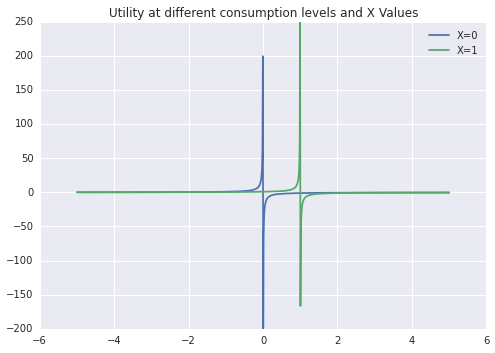

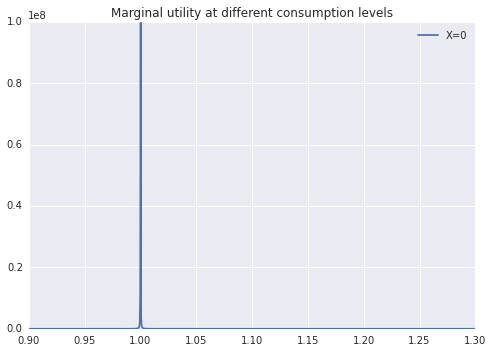

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

gamma = 2
plt.figure()
c = np.linspace(-5,5,1000)
[plt.plot(c, (c-X)**(1-gamma)/(1-gamma)) for X in [0,1]]
plt.legend(['X=0', 'X=1'])
plt.title('Utility at different consumption levels and X Values')
plt.figure()
c = np.linspace(0.9,1.3,1000)
plt.plot(c, (c-1)**-gamma, label = 'X=1')
plt.legend(['X=0', 'X=1'])
plt.title('Marginal utility at different consumption levels')
print('2,4,6')

####Question 2

What is the local risk aversion coefficient $rra=-\frac{cu^{′′}(c)}{u^′(c)}$ for this investor? Express your answer in terms of the "surplus consumption ratio" $S≡\frac{c−X}{c}$, which measures how much consumption exceeds $X$. 

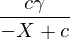

In [2]:
import sympy as sym
sym.init_printing(use_latex=True)

c, X, gamma = sym.symbols('c, X, gamma')
u_prime = sym.diff((c-X)**(1-gamma)/(1-gamma),c)
u_dbl_prime = sym.diff(u_prime,c)
sym.simplify(-c*u_dbl_prime/u_prime)

####Question 3

Using $\gamma=2$, $X=1$, find local risk aversion for $c=101,11,2,1.1$. Enter your answers as six numerical values separated by spaces. The point is to see how risk aversion behaves as consumption rises or declines.

In [3]:
def rra(gamma, X, c):
    return (c*gamma)/(c-X)

gamma = 2 
X = 1
print(*[rra(gamma, X, i) for i in [101, 11, 2, 1.1]])

2.02 2.2 4.0 21.999999999999982


####Question 4

In a continuous-time environment, in which consumption follows a diffusion 

$$\frac{dc_t}{c_t}=\mu dt+\sigma dz_t$$


and the investor with this utility function maximizes

$$E \int_{t=0}^{\infty} = e^{−\delta t}u(ct)dt$$

find an expression for the risk free rate in terms of $\delta, \gamma, \mu, \sigma$ and $S$ (Hint: retrace the steps we followed for the continuous-time consumption model. From $\Lambda= e^{−\delta t} u^′(ct)$ use Ito's lemma to find $\frac{d\Lambda}{\Lambda}$)

My answer is:

$r_f= -\delta - \frac{\gamma}{S} \mu  -\frac{1}{2}\frac{\gamma(\gamma+1)}{S^2}\sigma^2$

####Question 5

Your formula should show two effects: "intertemporal substitution" and "precautionary saving," as we discussed in the lecture. It should also show that interest rates now vary over time as $c−X$ and hence $S$ vary over time, even though consumption growth is iid so neither its expected value nor variance change over time. But it's not clear whether intertemporal substitution or precautionary saving wins.

To answer this question, make a graph of $r_f$ vs. $c$, using $\delta=0$, $\gamma=2$, $\sigma_c=0.02$, $\mu_c=0.01$.

As we go to bad economic times, i.e. as $c$ declines toward $X$ and $S$ declines, what happens to interest rates? 

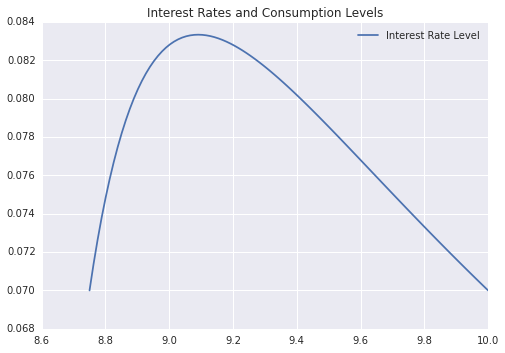

In [4]:
def r_f(delta, gamma, sigma, mu, c, X):
    return -delta + gamma * mu / ((c-X)/c) - 0.5 * gamma * (gamma+1) * sigma**2 / ((c-X)/c)**2

delta = 0
gamma = 2
sigma = 0.02
mu = 0.01
X = 8

c = np.linspace(X+0.75, 10, 100)
plt.plot(c, r_f(delta, gamma, sigma, mu, c, X), label = 'Interest Rate Level')
#plt.vlines(X, -X, X,linestyles='dashed', label='X')
plt.title('Interest Rates and Consumption Levels')
plt.legend();

####Question 6

In the same environment, find the maximum Sharpe ratio of all assets in annual units. i.e. if

$$dR_t−r^fdt=\mu Rdt+\sigma_Rdz^R_t,$$

find the maximum Sharpe ratio, using the Sharpe ratio bound from lecture:

$$\frac{∥\mu R∥}{\sigma R}≤\sigma \Lambda$$

Write your answer as a formula, in terms of this problem's setup. Remember the consumption process is 

$$\frac{dc}{c}=\mu dt+\sigma dz_t$$

My answer is:

$\frac{\gamma \sigma}{S} $

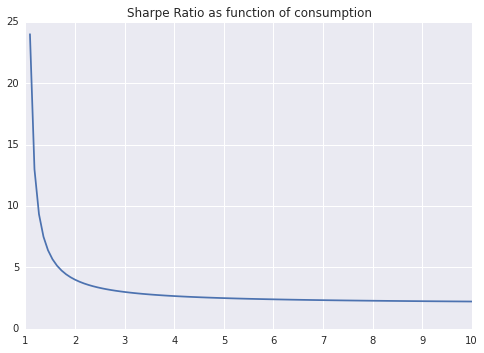

In [5]:
def max_sharpe(gamma, sigma, c, X):
    return gamma  / ((c-X)/c)

gamma = 2
sigma = 0.02
X = 1

c = np.linspace(1, 10, 100)
plt.plot(c, max_sharpe(gamma, sigma, c, X))
plt.title('Sharpe Ratio as function of consumption');

#Week 3 Homework 3: The equity premium/riskfree rate puzzle 

####Question 1

In lecture, I used the relationship

$$\frac{∥E(Re)∥}{\sigma(Re)}≤sigma(m)=\gamma\sigma(Δc)$$

(I'm writing the discrete-time version of the continuous-time relationship) to infer properties of asset returns from properties of the discount factor (consumption growth.) We can turn it around, and use this relationship to infer properties of the discount factor from observations of asset returns. Since we don't really know what the utility function is, this "reverse engineering" approach has been very useful.

The average Sharpe ratio for the market portfolio has been about 0.4 (7%/18%), at least to date. The standard deviation of consumption growth has been about 2%. What does this tell us about risk aversion $\gamma$? 

In [6]:
Sharpe = 0.4
sigma = 0.02
Sharpe/sigma

####Question 2

Wait a minute, the underlying equation (backing up a step) was

$$\frac{∥E(Re)∥}{σ(Re)}=\gamma\sigma(\Delta c)corr(\Delta c,R^e)$$

and the correlation of consumption growth with the market return is below 40%. (Most measures put it a lot lower than 40%, in fact. 40% is the value one gets with fourth quarter to fourth quarter annual data.) Using $corr(\Delta c,R^e)\leq 0.4$, what do we infer about $\gamma$? 

In [7]:
corr = 0.4
Sharpe/(sigma*corr)

####Question 3

Well, maybe we should just take the scientific approach and accept high risk aversion. However, we also have to satisfy the risk-free rate equation. Here too, we can see what observed asset prices imply for consumption growth and risk aversion:

$$rf=\delta+\gamma E(\Delta c)−\frac{1}{2}\gamma^2\sigma^2(\Delta c),$$


where $\Delta c$ denotes log consumption growth. Use $E(\Delta c)=0.02$ (2%), $\sigma(\Delta c)=0.02$ as before, use the historical average rf=0.01 (1%), and γ=20 (a number you should recognize.) What value of $\delta$ do these figures imply? 

In [8]:
def delta(rf, E_dc, s_dc, gamma):
    return rf - gamma * E_dc + 0.5 * gamma**2 * s_dc**2


E_dc = 0.02
s_dc = 0.02
rf = 0.01
gamma = 20

delta(rf, E_dc, s_dc, gamma)

####Question 4

In the last question, I asked you to calculate $\delta$ using $\gamma=20$, and you should have gotten a puzzling answer. Can you find any $\gamma$ that is both consistent with the lower bounds on $\gamma$ that you found in questions 1 and 2, and consistent with $\delta=0.01$? from the risk-free rate equation? (I chose that value to make the numbers easy. I'd call any value between 0.01 and 0.10 "reasonable".)

In [55]:
def rf (delta, E_dc, s_dc, gamma):
    return delta + gamma * E_dc - 0.5 * gamma**2 * s_dc**2

delta = 0.01

{i:rf(delta, E_dc, s_dc, i) for i in range(20,110,5) 
   if rf(delta, E_dc, s_dc, i) < 0.1 and rf(delta, E_dc, s_dc, i) > 0.009} 